# Keller - Segel 1 d Ejemplo 1

Consideraremos un esquema implícito para el tiempo, unas diferencias regresivas para $\nabla v$ y una progresiva para el término convectivo

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import math

Consideremos la siguiente ecuación:

$u_t = Du_{xx} - c \nabla \cdot (u v_x)$ para $0\leq x \leq L$ y $0 \leq t \leq T$

$v_t = E v_{xx} - k_1 v + k_2 u$

Con las condiciones de frontera:

$u(0,t)=0$ y $u(L,t)=0$ para $0\leq t \leq T$

Y con la condición inicial:

$u(x,0)=f(x)$ para $0\leq x \leq L$

Ahora cogeremos el número de nodos que tomaremos en cada intervalo. $Nx-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,L]$ y $Nt-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,T]$ (Es decir, si al final tendremos $Nt+1$ puntos contando los de los extremos en cada intervalo). 

A continuación, $a$ indica $\alpha$. Para comenzar de forma sencilla vamos a considerar $\alpha=1$.

In [4]:
from numpy import linspace, array

In [5]:
import ipywidgets

In [6]:
def implicit_1d(n, D2,k, h, k1, k2, v1, u1):
    v=zeros(n+1)
    r = D2*k/(h**2)
    s1 = k*k1
    s2 = k*k2
    for i in range(1,n-1):
        v[i]=r*v1[i+1]+(1-2*r-s1)*v1[i]+r*v1[i-1]+s2*u1[i]
    v[0]=v[1]
    v[n]=v[n-1]
    return v

In [7]:
def reg_prog_1d(n, m, D1, c, k, h, u1, v1):
    u=zeros(n+1)
    p1 = D1*k/(h**2)
    p2 = c*k/(h**2)
    for i in range(1, n-1):
        u[i]=(1-2*p1)*u1[i]+p1*(u1[i+1]+u1[i-1])-p2*(u1[i+1]*v1[i+1]-u1[i+1]*v1[i]-u1[i]*v1[i]+u1[i]*v1[i-1])
    u[0]=u[1]
    u[n]=u[n-1]
    return u    

In [8]:
def ks_progres_1d(a, b, T1, T2, n, m, D1, D2, k1, k2, c, coef):
    x = linspace(a, b, n+1)
    h = x[1] - x[0]
    t = linspace(T1, T2, m+1)
    k = t[1] - t[0]
    def u0(x):return exp(-coef*(x-(a+b)/2)) # Cambiar función
    def v0(x): return exp(-coef*(x-(a+b)/2))
    v=zeros(n+1)
    v1=zeros(n+1)
    u=zeros(n+1)
    u1=zeros(n+1)

    v1= v0(x)
    u1=u0(x)

    #for i in range(0, n+1):
    #    v1[i]=v0(x[i])

    #for i in range(0, n+1):
    #    u1[i]=u0(x[i])

    listu=[u1]
    listv=[v1]

    for j in range(0, m-1):
        v = implicit_1d(n, D2,k, h, k1, k2, v1, u1)
        listv.extend([v])
        u = reg_prog_1d(n, m, D1, c, k, h, u1, v1)
        listu.extend([u])
        u1=u
        v1=v
        u=zeros(n+1)
        v=zeros(n+1)
    return x, listu, listv

In [23]:
x_h, lista_u, lista_v = ks_progres_1d(0,1,0,1,15,17,1,1,0,0,0,2)

In [24]:
x_h

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       1.        ])

In [25]:
from matplotlib.pylab import plot, show, grid, legend

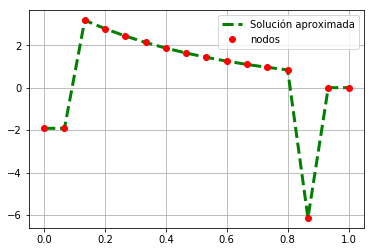

In [26]:
plot(x_h, lista_u[2],"--", label = "Solución aproximada", linewidth=3, color="green")
plot(x_h,lista_u[2],"o",c="r",label="nodos")
grid()
legend()
show()

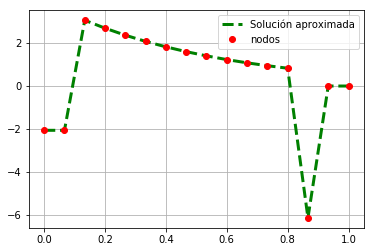

In [13]:
plot(x_h, lista_v[2],"--", label = "Solución aproximada", linewidth=3, color="green")
plot(x_h,lista_v[2],"o",c="r",label="nodos")
grid()
legend()
show()